# Problem 1


## (a)

The laplace parameters that give a mean of 0 and a standard deviation of 1, are location of $a = 0$  and a scale of $b = \frac{1}{\sqrt{2}}$. We use the function rlaplace() from the rmutil library with $a=0, b = \frac{1}{\sqrt{2}}$.

In [39]:
library(rmutil)
myrlaplace <- function(n){
    rlaplace(n, m = 0, s = 1/sqrt(2))
}

## (b)

In [207]:
X = rt(10000,df = 5)
sigma = sqrt(var(X))
mu = mean(X)
cat("The mean of the sample is ", mu, " and the standard deviation of the sample is ", sigma)

The mean of the sample is  0.0002142464  and the standard deviation of the sample is  1.315626



In general, for a t-distribution with $\nu$ degrees of freedom, $\sigma = \frac{\nu}{\nu-2}$.

In [47]:
rt5normalized <- function(n){
    x = rt(n, df = 5)
    z = (x-mean(x))/sqrt(var(x))
}

## (c)

In [208]:
library(rmutil)

MCprice2 <- function(Price, Strike, Rate, Time, Volatility, Steps, Paths, dist = "normal") {
  # Price<-100.
  # Strike<-100.
  # Rate <-0.03
  # Time <-1/4
  # Volatility <- 0.20
  # Steps=100
  # Paths=1000
  # dist = "normal"
  
# Monte Carlo pricer for vanilla options [8/8/2016 pfm]
#     Paul F Mende, 18.642 Lecture
# Input arguments use consistent units, e.g., annualized
# Price:  current price of underlying
# Strike: strike price of option contract
# Rate:   risk-free rate
# Time:   time to expiration
# Volatility
# Steps: number of time steps in discretization
# Paths:  number of Monte Carlo simulation paths
  
  S0    <- Price
  K     <- Strike
  rf    <- Rate
  T     <- Time
  sigma <- Volatility
  Nt    <- Steps
  Np    <- Paths
  dt    <- T/Nt

# Select independent, normalized Gaussian shocks
if (dist == 'normal'){
    epsilon <- matrix(rnorm(Nt*Np), ncol=Np)
}
else if (dist == "laplace"){
    epsilon <- matrix(myrlaplace(Nt*Np), ncol=Np)    
}
else if(dist == "student"){
    epsilon <- matrix(rt5normalized(Nt*Np), ncol=Np)
}

# Define IID returns for each step and path under risk-neutral measure

r <- (rf - 0.5*sigma^2)*dt + epsilon*sigma*sqrt(dt)

# Construct stochastic paths and price process

logX  <- apply(r,2,cumsum)
S     <- matrix(S0, Nt+1, Np)
S[-1,] <- S0 * exp(logX)

# Define payoff values for derivatives
C <- (S-K) * (S>K)
P <- (K-S) * (S<K)

# Compute call and put values as discounted expected payoffs
Call <- exp(-rf*T)*mean(C[Nt+1,])
Put  <- exp(-rf*T)*mean(P[Nt+1,])

# Return values
return(data.frame(call=Call, put=Put))
}

## (d)

In [99]:
S0 <- 100; K <- 100; T <- 1; rf <- 0.03; sigma <- 0.3; 
Nt <- 252; Np <- 1e4; dt=T/Nt
set.seed(1)
print("laplace")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "laplace")
print("normal")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "normal")
print("student")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "student")




[1] "laplace"


call,put
13.02314,10.42178


[1] "normal"


call,put
13.48036,10.50638


[1] "student"


call,put
13.15767,10.26853


# Problem 2
## (a)

The Central Limit Theorem (CLT) does apply in this case, but will not help us at all, as it will approximate all the distributions the same way, as they all have the same mean and standard deviation.

## (b)

In [57]:
S0 <- 100; K <- 100; T <- 1/12; rf <- 0.03; sigma <- 0.3; 
Nt <- 21; Np <- 1e4; dt=T/Nt
set.seed(1)
print("laplace")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "laplace")
print("normal")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "normal")
print("student")
MCprice2(S0,K,rf,T,sigma,Nt,Np, dist = "student")



[1] "laplace"


call,put
3.475097,3.314262


[1] "normal"


call,put
3.574573,3.284988


[1] "student"


call,put
3.586916,3.331807


## (c)


From the answers to the previous questions it seems that:
\begin{itemize}
\item The Student and the Normal distribution result in very similar values. The Laplace distribution leads to the smallest spread between call and put price, and the Normal distribution has the largest. 
\item The larger the maturity of the option, the larger the call and put values.
\item The number of increments in the Monte Carlo paths does not drastically change the outcome, but leads to slightly larger numbers.
\end{itemize}

# Problem 3

## (a)
\begin{align}
  X_{t+1}|(X_t =x_t) &= \alpha_0 + \alpha_1 x_t + \epsilon_{t+1} \\
  f(X_{t+1}) &= Z \sim N(\alpha_0 + \alpha_1 x_t, \sigma^2) \\
  &= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_{t+1}-\alpha_0 + \alpha_1 x_t)^2}{2\sigma^2}}
\end{align}

## (b)

The distribution of $X_t$ will be:
    $$Z_t = a_0 \sum_{i=0}^{t-1}a_1^i + a_1^tx_0 + \sum_{i=0}^{t-1}a_1^i \epsilon_{t-i}$$
Then the expectation of $Z_t$ will be:

$$E[Z_t] = \sum_{i=0}^{t-1}a_1^i + a_1^tx_0$$ which for large enough $t$ and $a_1 <1$, will be equal to 

\begin{align}
    E[Z_t] &= a_0\sum_{i=0}^{t-1}a_1^i \\
    &= \frac{a_0}{1-a_1}
\end{align}

The variance then would be:

\begin{align}
    Var[Z_t] &= Var[\sum_{i=0}^{t-1}a_1^i\epsilon_{t-i}]\\
    &= \sigma^2 \sum_{i=0}^{t-1}\big(a_1^i\big)^2 \\
    &= \frac{\sigma^2}{1-a_1^2}
\end{align}

Thus the distribution is stationary with:
$$\mu_0 = \alpha_0/(1-\alpha_1)$$
$$\sigma_0^2 = \sigma^2/(1-a_1^2)$$

## (c)

In [107]:
ar_path <- function(T, a_0, a_1, x, mu=0, sigma=1){
    for (i in 2:T){
        x[i] = a_0 + a_1*x[i-1] + rnorm(1, mean = mu, sd = sigma^2)
    }
    return(x)
}

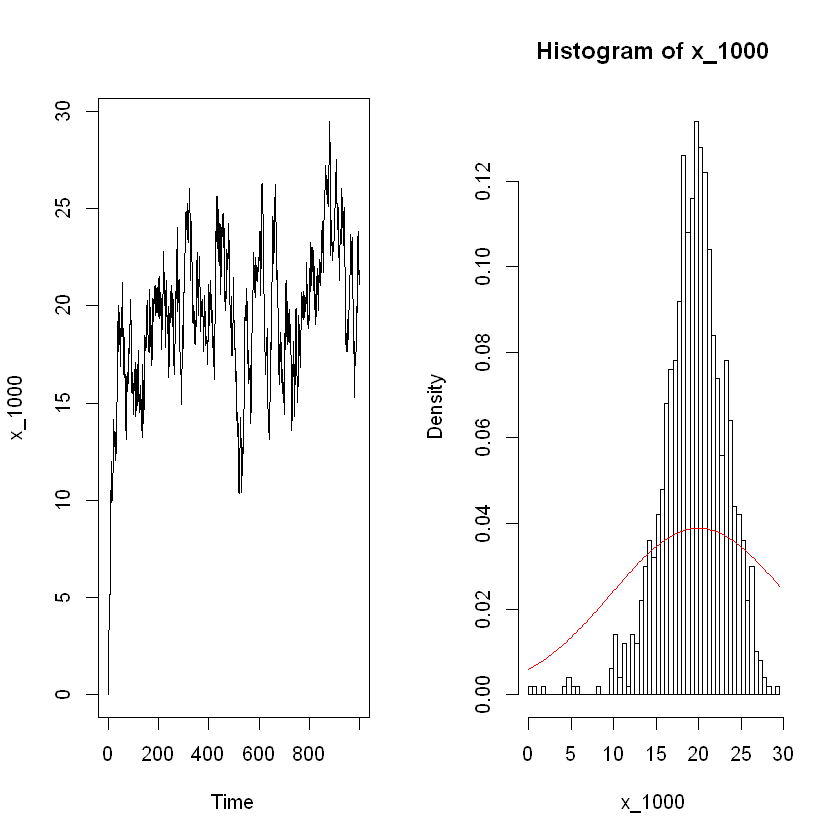

In [144]:
T = 1000; a_0 = 1; a_1 = 0.95; mu =0; sigma = 1; x=0
sigma = 1
mu_0 = a_0/(1-a_1)
sigmasq_0 = sigma^2/(1-a_1^2)

x_1000 = ar_path(T, a_0, a_1, x)

par(mfcol = c(1,2))
ts.plot(x_1000)
hist(x_1000, nclass = 100, freq = FALSE)
curve(dnorm(x, mu_0, sigmasq_0), col = "red", add = TRUE)



## (d)

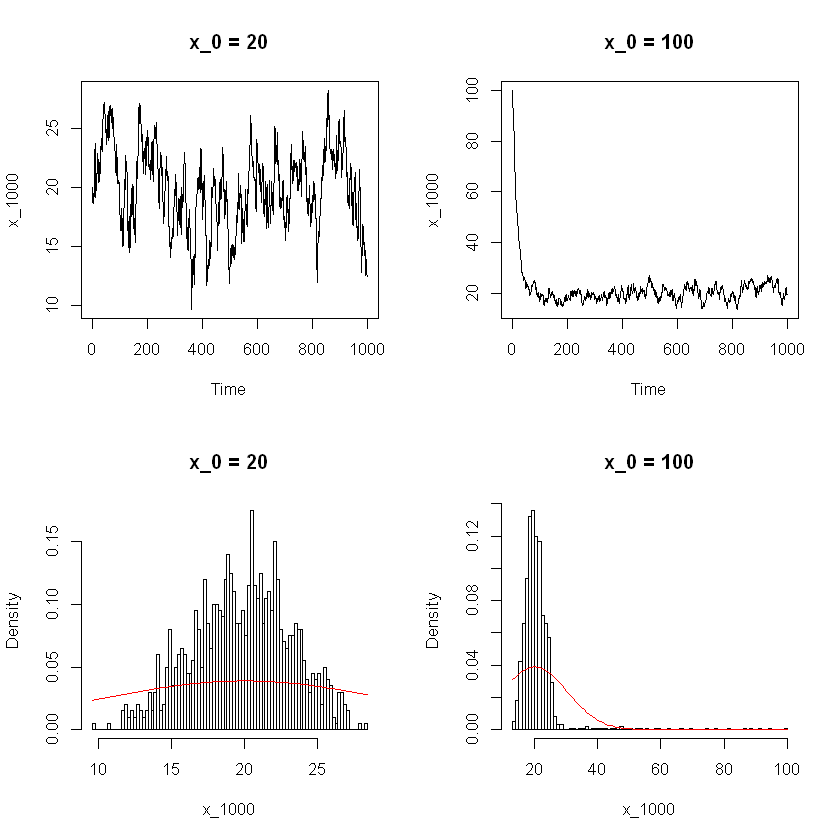

In [173]:
T = 1000; a_0 = 1; a_1 = 0.95; mu =0; sigma = 1; x=20
sigma = 1
mu_0 = a_0/(1-a_1)
sigmasq_0 = sigma^2/(1-a_1^2)

x_1000 = ar_path(T, a_0, a_1, x)
par(mfcol = c(2,2))

ts.plot(x_1000, main = "x_0 = 20")
hist(x_1000, nclass = 100, freq = FALSE, main = "x_0 = 20")
curve(dnorm(x, mu_0, sigmasq_0), col = "red", add = TRUE)


T = 1000; a_0 = 1; a_1 = 0.95; mu =0; sigma = 1; x=100
sigma = 1
mu_0 = a_0/(1-a_1)
sigmasq_0 = sigma^2/(1-a_1^2)

x_1000 = ar_path(T, a_0, a_1, x)
ts.plot(x_1000, main = "x_0 = 100")
hist(x_1000, nclass = 100, freq = FALSE, main = "x_0 = 100")
curve(dnorm(x, mu_0, sigmasq_0), col = "red", add = TRUE)


As we explained earlier, the distribution will settle at a stationary distribution of $E[Z_t] = \frac{\alpha_0}{1-\alpha_1} = 20$. Thus the first distribution whose $X_0$ = 20, looks "more stationary" and its distribution has less variability. On the other hand, the distribution that starts from 100, quickly converges to values close to 20 and it's histogram has much larger tails. However we can see that the effect on the final value is not very pronounced.

## (e)

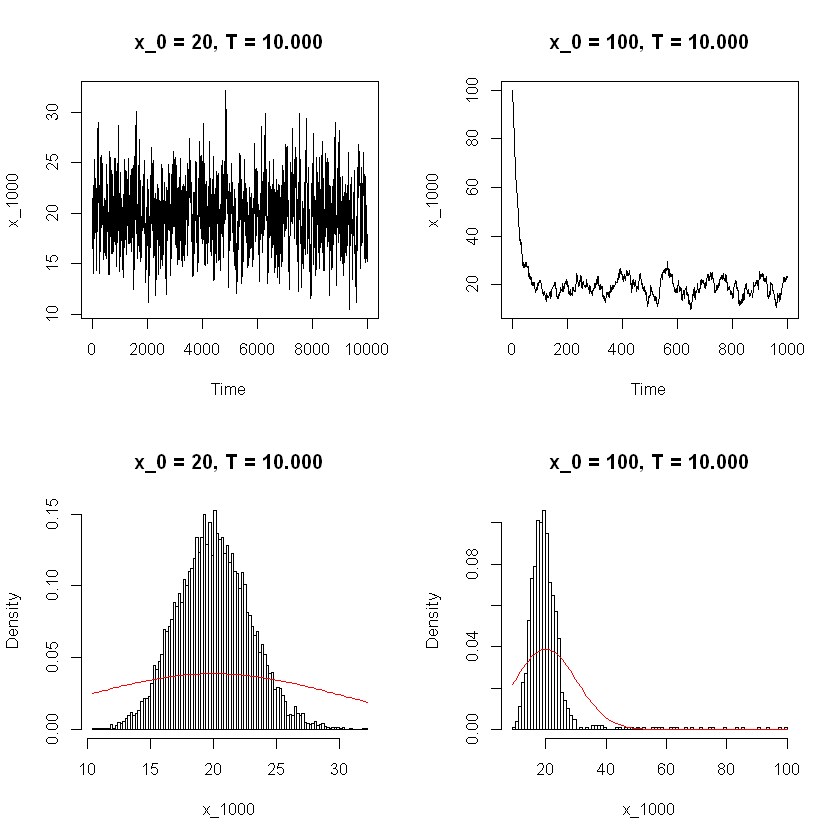

In [162]:
T = 10000; a_0 = 1; a_1 = 0.95; mu =0; sigma = 1; x=20
sigma = 1
mu_0 = a_0/(1-a_1)
sigmasq_0 = sigma^2/(1-a_1^2)

x_1000 = ar_path(T, a_0, a_1, x)

par(mfcol = c(2,2))

ts.plot(x_1000, main = "x_0 = 20, T = 10.000")
hist(x_1000, nclass = 100, freq = FALSE, main = "x_0 = 20, T = 10.000")
curve(dnorm(x, mu_0, sigmasq_0), col = "red", add = TRUE)


T = 1000; a_0 = 1; a_1 = 0.95; mu =0; sigma = 1; x=100
sigma = 1
mu_0 = a_0/(1-a_1)
sigmasq_0 = sigma^2/(1-a_1^2)

x_1000 = ar_path(T, a_0, a_1, x)
ts.plot(x_1000, main = "x_0 = 100, T = 10.000")
hist(x_1000, nclass = 100, freq = FALSE, main = "x_0 = 100, T = 10.000")
curve(dnorm(x, mu_0, sigmasq_0), col = "red", add = TRUE)

We can see that now the distribution converges even faster (relatively to total time), so the final value of the distribution depends even less on the initial one.

## (f)

Excluding the values of a distribution during an initial burn-in period might be useful because it allows us to disregard the values where the distribution converges to the stationary one, and get rid of the outlying values. The length of the burn-in period would depend on the initial value. A good initial value would be one not further than $3\sigma_0$ from $\mu_0$ and the amount of time to wait would be until we reach values close to $3-4\sigma_0$ from $\mu_0$.

# Problem 4
## (a)

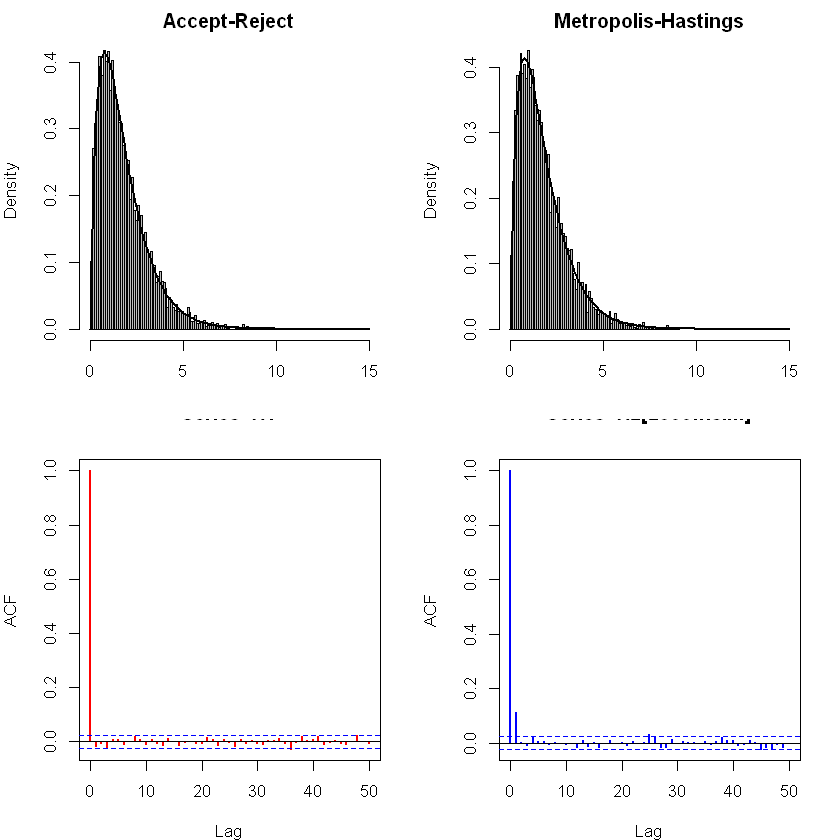

In [76]:
library(mcsm)
a=1.75;nsim=10000;
X1=X2=array(0,dim=c(nsim,1))            #AR & MH
X1[1]=X2[1]=rgamma(1,a,rate=1)                #initialize the chain
for (i in 2:nsim){
    Y=rgamma(1,floor(a),rate=floor(a)/a)    #candidate
    rhoAR=(exp(1)*Y*exp(-Y/a)/a)^(a-floor(a))
    rhoMH=(dgamma(Y,a,rate=1)/dgamma(X2[i-1],a,rate=1))/(dgamma(Y,floor(a),
    rate=floor(a)/a)/dgamma(X2[i-1],floor(a),rate=floor(a)/a))
    rhoMH=min(rhoMH,1)
    X1[i]=Y*(runif(1)<rhoAR)                       #accepted values
    X2[i]=X2[i-1] + (Y-X2[i-1])*(runif(1)<rhoMH)
}
X1_org = X1
X1=X1[X1!=0]                   #The AR sample
par(mfrow=c(2,2),mar=c(4,4,2,2))
hist(X1,col="grey",nclas=125,freq=FALSE,xlab="",main="Accept-Reject",xlim=c(0,15))
curve(dgamma(x, a, rate=1),lwd=2,add=TRUE)
hist(X2[2500:nsim],nclas=125,col="grey",freq=FALSE,xlab="",main="Metropolis-Hastings",xlim=c(0,15))
curve(dgamma(x, a, rate=1),lwd=2,add=TRUE)
acf(X1,lag.max=50,lwd=2,col="red")              #Accept-Reject
acf(X2[2500:nsim],lag.max=50,lwd=2,col="blue")  #Metropolis-Hastings

In [80]:
x1_reject = (sum(X1_org == 0))/length(X1)

In [81]:
rejects = 0
for (i in 2:length(X2)){
    if(X2[i]!=X2[i-1]){
    rejects = rejects +1
    }
}
x2_reject = rejects/length(X2)

The rejection rate of X1 is {{x1_reject}}, and that of X2, is: {{x2_reject}}

## (b)


	Two-sample Kolmogorov-Smirnov test

data:  jitter(X) and rbeta(5000, a, b)
D = 0.0252, p-value = 0.08357
alternative hypothesis: two-sided


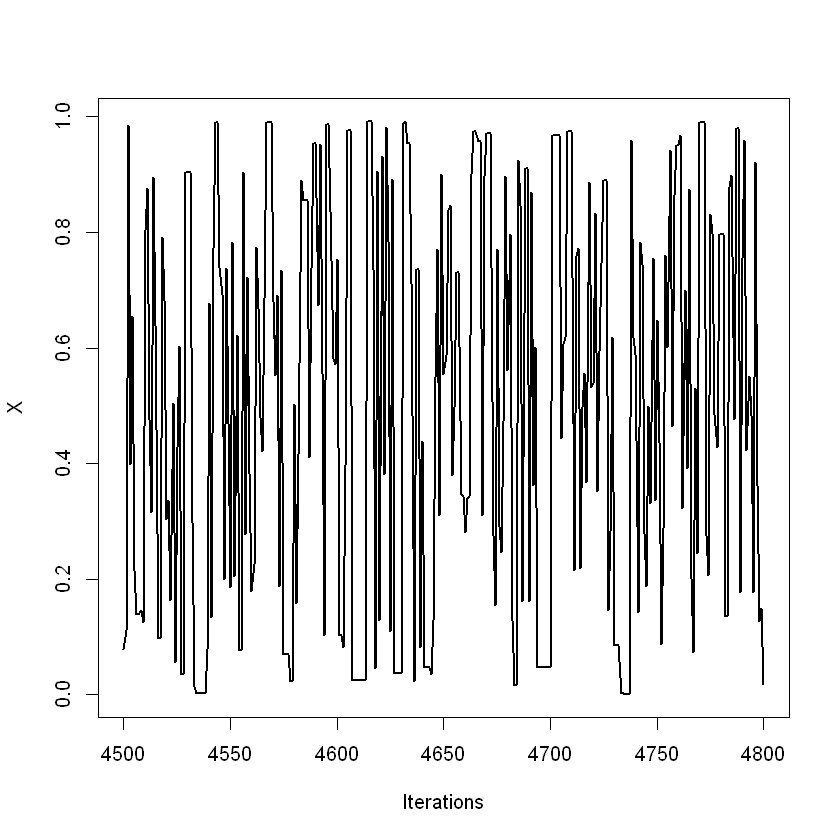

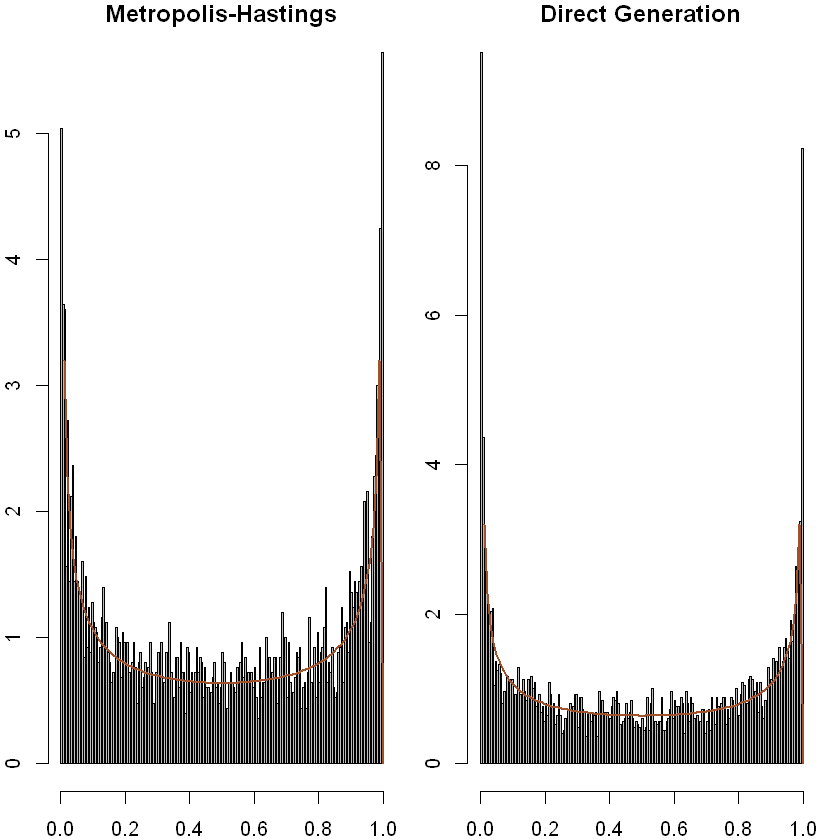

In [86]:
a=0.5; b=0.5; c=2.669 # initial values
nsim=5000
X=rep(runif(1),nsim)  # initialize the chain
for (i in 2:nsim){
   Y=runif(1)
   rho=dbeta(Y,a,b)/dbeta(X[i-1],a,b)
   X[i]=X[i-1] + (Y-X[i-1])*(runif(1)<rho)
   }
#X11(h=3.5);m
plot(4500:4800,X[4500:4800],ty="l",lwd=2,xlab="Iterations",ylab="X")

ks.test(jitter(X),rbeta(5000,a,b))

par(mfrow=c(1,2),mar=c(2,2,1,1))
hist(X,nclass=150,col="grey",main="Metropolis-Hastings",fre=FALSE)
curve(dbeta(x,a,b),col="sienna",lwd=2,add=TRUE)
hist(rbeta(5000,a,b),nclass=150,col="grey",main="Direct Generation",fre=FALSE)
curve(dbeta(x,a,b),col="sienna",lwd=2,add=TRUE)


## (c)

It is not possible to apply the Accept-Reject method for the Beta(a=b= 0:5) distribution above because its density is unbounded.

## (d)


In [94]:
hastings2<- function (nsim = 10^3) 
{
    a = c(0.5, 1., 5.)
    na = length(a)
    x = array(0, c(na, nsim))
    for (i in 1:na) {
        acc = 0
        for (j in 2:nsim) {
            y <- x[i, (j - 1)] + runif(1, min = -a[i], max = a[i])
            r = min(exp(-0.5 * ((y^2) - (x[i, (j - 1)]^2))), 
                1)
            u <- runif(1)
            acc = acc + (u < r)
            x[i, j] <- y * (u < r) + x[i, (j - 1)] * (u > r)
        }
    }
    par(mfrow = c(3, na), mar = c(4, 4, 2, 1))
    for (i in 1:na) plot((nsim - 500):nsim, x[i, (nsim - 500):nsim], 
        ty = "l", lwd = 2, xlab = "Iterations", ylab = "", main = paste("Rate", 
            (length(unique(x[i, ]))/nsim), sep = " "))
    for (i in 1:na) {
        hist(x[i, ], freq = F, xlim = c(-4, 4), ylim = c(0, 0.4), 
            col = "grey", ylab = "", xlab = "", breaks = 35, 
            main = "")
        curve(dnorm(x), lwd = 2, add = T)
    }
    for (i in 1:na) acf(x[i, ], main = "")
}


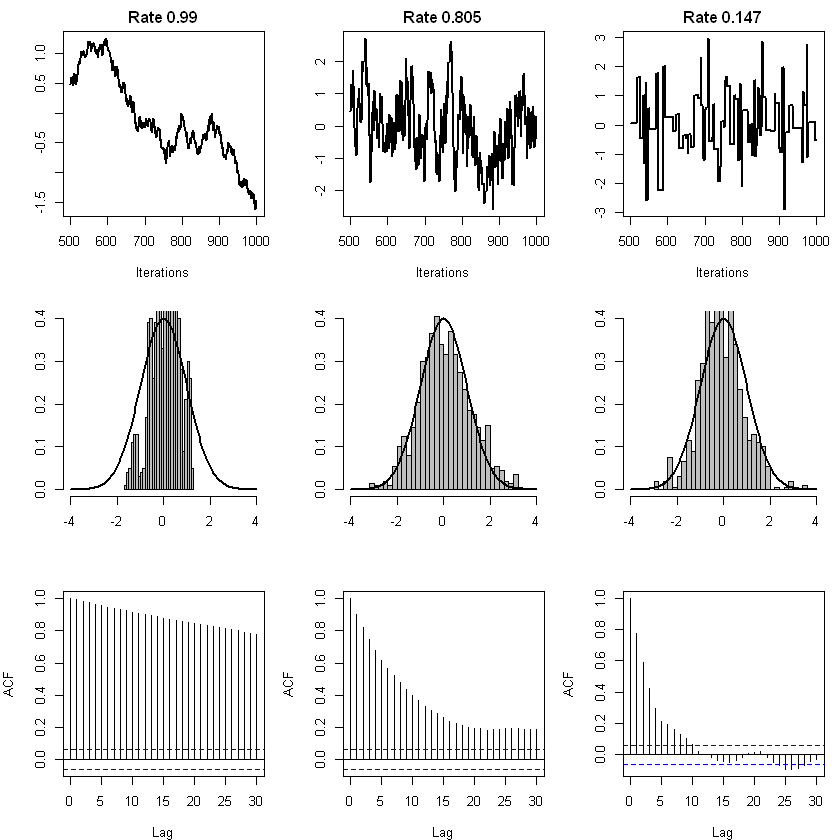

In [96]:
hastings()

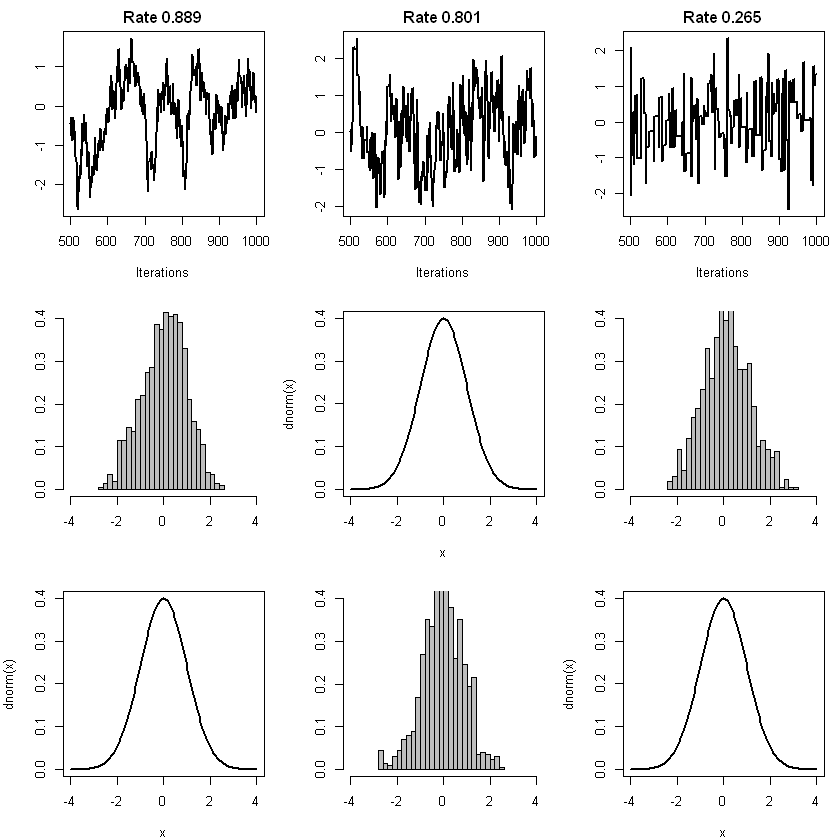

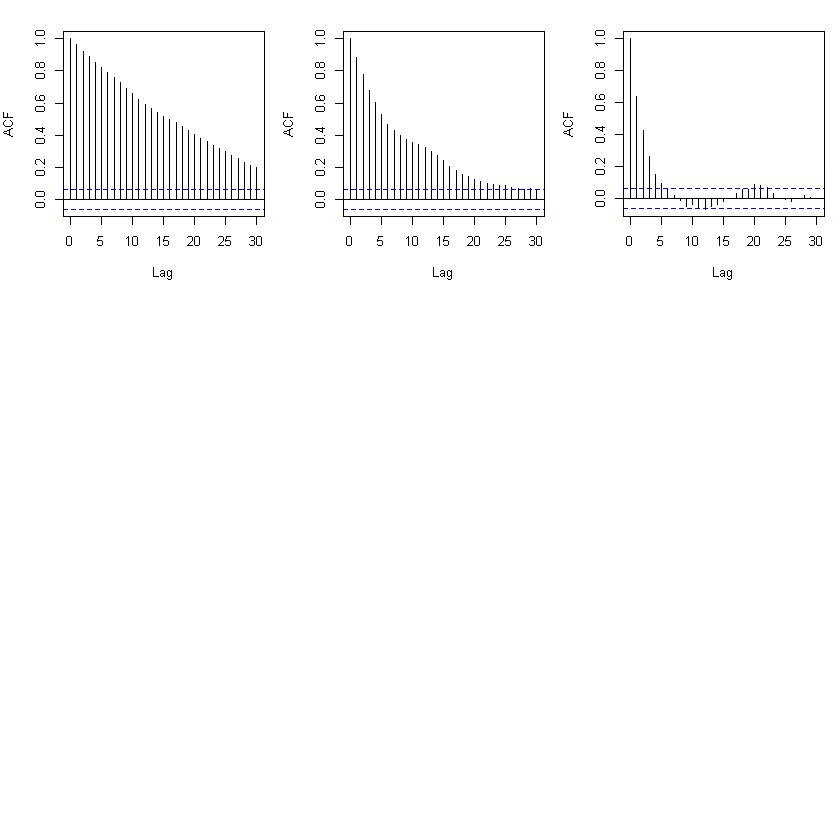

In [209]:
hastings2()

The paths for the Markov-Chain are generated using a random walk where the step-sizes are a symmetric uniform distribution of width $2a$. The acceptance rate decreases with $a$, because as $a$ increases, more proposed moves will be too big and will be rejected.

It is not always better to always use a candidate distribution with a higher acceptance rate. For example, a high acceptance rate might result in very small steps, and so the parameter space might not be fully explored.

The ACF function has higher values the smaller the value of a, because sometimes do not fully explore the parameter space.